In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
from scipy.stats import linregress
import numpy as np 
import requests
from config import api_key
import json


#import csv files 
imbd_data_path = "imdb_merged.csv"
gd_data_path = "mcu_domestic_global_box_office_fixed.csv"

#create data frame
imbd_data = pd.read_csv(imbd_data_path)
gd_data = pd.read_csv(gd_data_path)

#merge the data frames 
marvel_data = imbd_data
marvel_data

,Uniq Id,Crawl Timestamp,Pageurl,Title,Genres,Release Date,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Collection
0,90bd11174adf73475d088f93a2da28da,2019-05-29 12:30:33 +0000,https://www.imdb.com/title/tt1228705/,Iron Man 2,Action|Adventure|Sci-Fi,7 May 2010 (USA),PG-13,7.0,124 min,Directed by Jon Favreau. With Robert Downey Jr...,Robert Downey Jr.|Mickey Rourke|Gwyneth Paltro...,English|French|Russian,"D.C. Stages, 1360 East 6th Street, Downtown, L...","$200,000,000","$623,933,331,"
1,df6fc7d029a7e5c214509cbfb513d283,2019-05-29 12:31:05 +0000,https://www.imdb.com/title/tt2015381/,Guardians of the Galaxy,Action|Adventure|Comedy|Sci-Fi,1 August 2014 (USA),PG-13,8.1,121 min,"Directed by James Gunn. With Chris Pratt, Vin ...",Chris Pratt|Vin Diesel|Bradley Cooper|Zoe Saldana,English,"Shepperton Studios, Shepperton, Surrey, Englan...","$170,000,000","$774,176,600"
2,4f73f64a1b559ac76448fd9347bca974,2019-05-29 12:31:37 +0000,https://www.imdb.com/title/tt1825683/,Black Panther,Action|Adventure|Sci-Fi,16 February 2018 (USA),PG-13,7.3,134 min,Directed by Ryan Coogler. With Chadwick Bosema...,Chadwick Boseman|Michael B. Jordan|Lupita Nyon...,English|Swahili|Nama|Xhosa|Korean,"Pinewood Atlanta Studios, 461 Sandy Creek Road...","$200,000,000","$1,347,071,259"
3,35ced81a516bc02c3f303015cb7a068f,2019-05-29 12:30:49 +0000,https://www.imdb.com/title/tt1300854/,Iron Man 3,Action|Adventure|Sci-Fi,3 May 2013 (USA),PG-13,7.2,130 min,Directed by Shane Black. With Robert Downey Jr...,Robert Downey Jr.|Guy Pearce|Gwyneth Paltrow|D...,English,"Cary, North Carolina, USA","$200,000,000","$1,215,439,994"
4,1b678fd492c4e7e9670d9821771d4969,2019-05-29 12:30:25 +0000,https://www.imdb.com/title/tt0800080/,The Incredible Hulk,Action|Adventure|Sci-Fi,13 June 2008 (USA),PG-13,6.7,112 min,Directed by Louis Leterrier. With Edward Norto...,Edward Norton|Liv Tyler|Tim Roth|William Hurt,English|Portuguese|Spanish,"Cherry Street Bridge, Toronto, Ontario, Canada","$150,000,000","$263,427,551"
5,430d1d4ab49d0606c260e17b0dc0bb93,2019-05-29 12:31:49 +0000,https://www.imdb.com/title/tt4154664/,Captain Marvel,Action|Adventure|Sci-Fi,8 March 2019 (USA),PG-13,7.1,123 min,"Directed by Anna Boden, Ryan Fleck. With Brie ...",Brie Larson|Samuel L. Jackson|Ben Mendelsohn|J...,English,"Los Angeles, California, USA",NaN,"$1,126,318,317,"
6,c71e93e0f4eb6e5cd73137f051262007,2019-05-29 12:30:21 +0000,https://www.imdb.com/title/tt0371746/,Iron Man,Action|Adventure|Sci-Fi,2 May 2008 (USA),PG-13,7.9,126 min,Directed by Jon Favreau. With Robert Downey Jr...,Robert Downey Jr.|Gwyneth Paltrow|Terrence How...,English|Persian|Urdu|Arabic|Hungarian,"Palmdale Regional Airport, Palmdale, Californi...","$140,000,000","$585,174,222,"
7,f59d540280f7a915c1823908ff695e14,2019-05-29 12:30:38 +0000,https://www.imdb.com/title/tt0800369/,Thor,Action|Adventure|Fantasy|Sci-Fi,6 May 2011 (USA),PG-13,7.0,115 min,Directed by Kenneth Branagh. With Chris Hemswo...,Chris Hemsworth|Anthony Hopkins|Natalie Portma...,English,"Galisteo, New Mexico, USA","$150,000,000","$449,326,618"
8,26f5c6056bfbbfe50d427cd97845c899,2019-05-29 12:31:19 +0000,https://www.imdb.com/title/tt3498820/,Captain America: Civil War,Action|Adventure|Sci-Fi,6 May 2016 (USA),PG-13,7.8,147 min,"Directed by Anthony Russo, Joe Russo. With Chr...",Chris Evans|Robert Downey Jr.|Scarlett Johanss...,English|German|Xhosa|Russian|Romanian|Hindi,"Atlanta, Georgia, USA","$250,000,000","$1,153,304,495"
9,ba4864cd7af4a074c686d50b10d27081,2019-05-29 12:31:41 +0000,https://www.imdb.com/title/tt4154756/,Avengers: Infinity War,Action|Adventure|Sci-Fi,27 April 2018 (USA),PG-13,8.5,149 min,"Directed by Anthony Russo, Joe Russo. With Rob...",Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,English,"Pinewood Atlanta Studios, 461 Sandy Creek Road...","$321,000,000","$2,048,709,917"


In [65]:
actors_df = marvel_data.loc[:,["Title", "Review Rating", "Collection"]]
actors_df["Lead Actor"] = " "
actors_df["Global Sales"] = " "

actors_df

,Title,Review Rating,Collection,Lead Actor,Global Sales
0,Iron Man 2,7.0,"$623,933,331,",,
1,Guardians of the Galaxy,8.1,"$774,176,600",,
2,Black Panther,7.3,"$1,347,071,259",,
3,Iron Man 3,7.2,"$1,215,439,994",,
4,The Incredible Hulk,6.7,"$263,427,551",,
5,Captain Marvel,7.1,"$1,126,318,317,",,
6,Iron Man,7.9,"$585,174,222,",,
7,Thor,7.0,"$449,326,618",,
8,Captain America: Civil War,7.8,"$1,153,304,495",,
9,Avengers: Infinity War,8.5,"$2,048,709,917",,


In [71]:

for index, movie in marvel_data.iterrows():
    Lead = str(movie["Cast"]).split("|")[0]
    actors_df.loc[index, "Lead Actor"] = Lead
    Profit = str(movie["Collection"]).replace("$","").replace(",","")
    actors_df.loc[index, "Global Sales"] = Profit
    
actors_df

,Title,Review Rating,Collection,Lead Actor,Global Sales
0,Iron Man 2,7.0,"$623,933,331,",Robert Downey Jr.,623933331
1,Guardians of the Galaxy,8.1,"$774,176,600",Chris Pratt,774176600
2,Black Panther,7.3,"$1,347,071,259",Chadwick Boseman,1347071259
3,Iron Man 3,7.2,"$1,215,439,994",Robert Downey Jr.,1215439994
4,The Incredible Hulk,6.7,"$263,427,551",Edward Norton,263427551
5,Captain Marvel,7.1,"$1,126,318,317,",Brie Larson,1126318317
6,Iron Man,7.9,"$585,174,222,",Robert Downey Jr.,585174222
7,Thor,7.0,"$449,326,618",Chris Hemsworth,449326618
8,Captain America: Civil War,7.8,"$1,153,304,495",Chris Evans,1153304495
9,Avengers: Infinity War,8.5,"$2,048,709,917",Robert Downey Jr.,2048709917


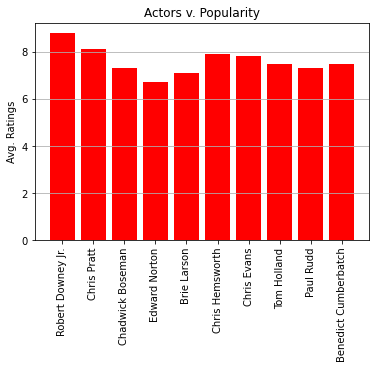

In [72]:
x = actors_df["Lead Actor"]
y = actors_df["Review Rating"]

plt.bar(x, y, color="r")
plt.title('Actors v. Popularity')
plt.xticks(rotation=(90))
plt.ylabel('Avg. Ratings')
plt.grid(axis = 'y')
plt.savefig("Fig01.png")

plt.show()

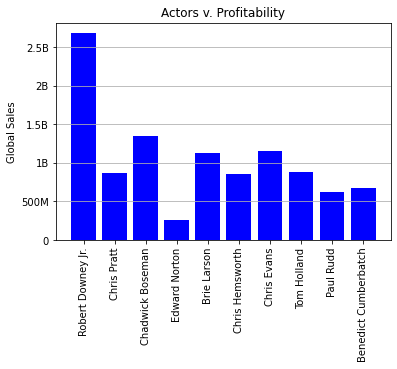

In [73]:
x = actors_df["Lead Actor"]
y = actors_df["Global Sales"].astype(float)/ 1000000

plt.bar(x, y, color="b")
plt.title('Actors v. Profitability')
plt.xticks(rotation=(90))
plt.ylabel('Global Sales')
plt.yticks([0, 500, 1000, 1500, 2000, 2500],
          ["0", "500M", "1B", "1.5B", "2B", "2.5B"])
plt.grid(axis = 'y')
plt.savefig("Fig02.png")


plt.show()